In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')
df_sample = pd.read_csv('../input/sample_submission.csv')

In [3]:
#check the decoration
df_train.columns

Index(['Outcome_M1', 'Outcome_M2', 'Outcome_M3', 'Outcome_M4', 'Outcome_M5',
       'Outcome_M6', 'Outcome_M7', 'Outcome_M8', 'Outcome_M9', 'Outcome_M10',
       ...
       'Cat_505', 'Cat_506', 'Cat_507', 'Cat_508', 'Cat_509', 'Cat_510',
       'Cat_511', 'Cat_512', 'Cat_513', 'Cat_514'],
      dtype='object', length=558)

In [4]:
df_train.head()

,Outcome_M1,Outcome_M2,Outcome_M3,Outcome_M4,Outcome_M5,Outcome_M6,Outcome_M7,Outcome_M8,Outcome_M9,Outcome_M10,...,Cat_505,Cat_506,Cat_507,Cat_508,Cat_509,Cat_510,Cat_511,Cat_512,Cat_513,Cat_514
0,10000,3000.0,8000.0,3000.0,3000.0,2000.0,2000.0,500.0,500.0,500.0,...,0,0,0,1,0,1,0,0,0,1
1,8000,8000.0,2000.0,3000.0,2000.0,500.0,2000.0,2000.0,3000.0,500.0,...,0,0,0,1,0,0,0,0,0,1
2,5000,15000.0,8000.0,3000.0,3000.0,2000.0,2000.0,2000.0,2000.0,500.0,...,0,0,0,1,0,0,0,0,0,1
3,35000,8000.0,8000.0,5000.0,5000.0,3000.0,2000.0,3000.0,6000.0,2000.0,...,0,0,0,1,0,1,0,0,0,1
4,16000,2000.0,2000.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,0,0,0,1,0,1,0,0,0,1


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Columns: 558 entries, Outcome_M1 to Cat_514
dtypes: float64(37), int64(521)
memory usage: 3.2 MB


In [6]:
df_train.describe()

,Outcome_M1,Outcome_M2,Outcome_M3,Outcome_M4,Outcome_M5,Outcome_M6,Outcome_M7,Outcome_M8,Outcome_M9,Outcome_M10,...,Cat_505,Cat_506,Cat_507,Cat_508,Cat_509,Cat_510,Cat_511,Cat_512,Cat_513,Cat_514
count,751.000000,748.000000,746.000000,746.000000,727.000000,705.000000,694.000000,687.000000,677.000000,656.000000,...,751.0,751.0,751.0,751.0,751.0,751.000000,751.000000,751.000000,751.000000,751.0
mean,20620.505992,10837.566845,5194.369973,3494.638070,2852.132050,2018.439716,1751.440922,1492.721980,1411.373708,1320.884146,...,0.0,0.0,0.0,1.0,0.0,0.302264,0.029294,0.034621,0.010652,1.0
std,54893.895765,26447.885519,10151.524258,6778.269518,6605.350344,2927.572752,1996.524238,1959.116988,2030.529714,1655.987926,...,0.0,0.0,0.0,0.0,0.0,0.459545,0.240432,0.182938,0.145670,0.0
min,2000.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0
25%,2000.000000,2000.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0
50%,5000.000000,3000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,500.000000,500.000000,500.000000,...,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0
75%,16000.000000,8000.000000,5000.000000,3000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,0.0,0.0,0.0,1.0,0.0,1.000000,0.000000,0.000000,0.000000,1.0
max,795000.000000,315000.000000,108000.000000,74000.000000,81000.000000,27000.000000,21000.000000,21000.000000,23000.000000,23000.000000,...,0.0,0.0,0.0,1.0,0.0,1.000000,2.000000,1.000000,2.000000,1.0


In [7]:
plt.rcParams["figure.figsize"] = (18,9)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

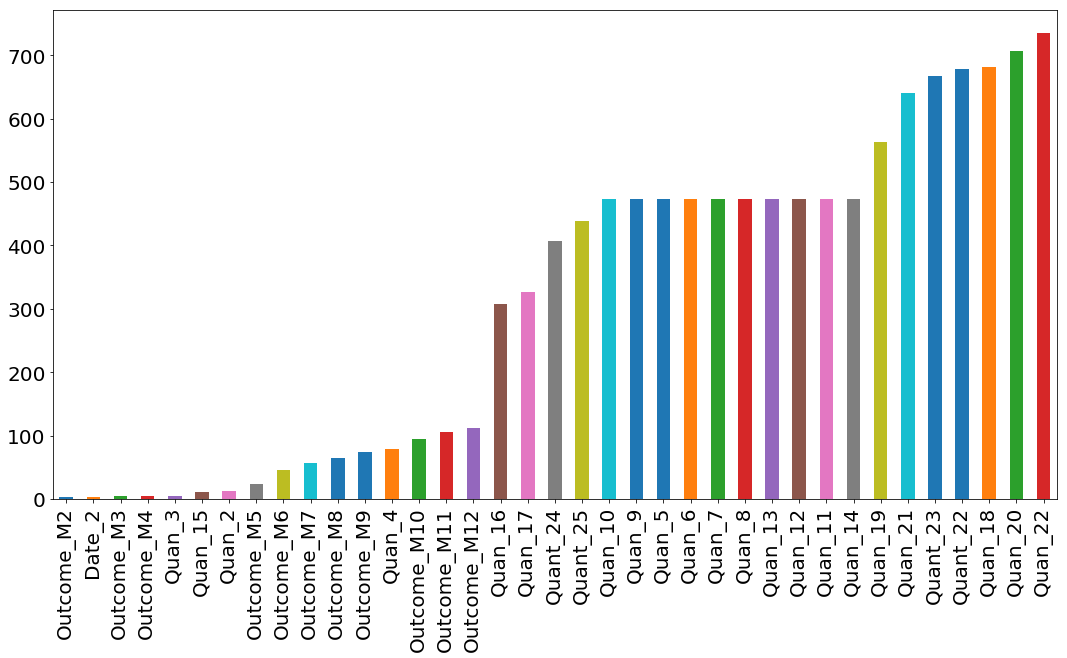

In [8]:
# check missing values
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [9]:
plt.rcParams["figure.figsize"] = (18,9)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

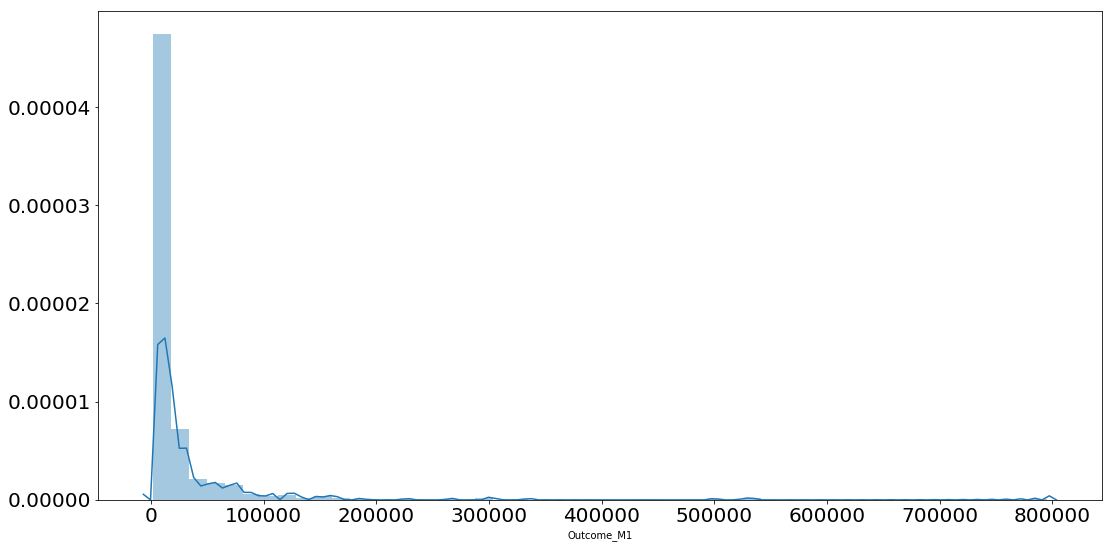

In [10]:
#histogram
sns.distplot(df_train['Outcome_M1'])

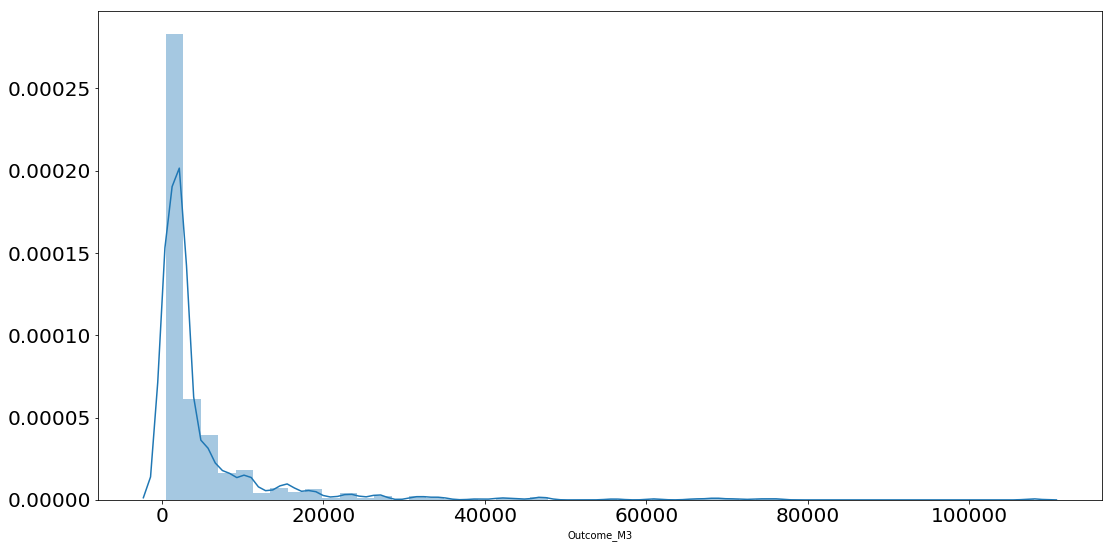

In [11]:
sns.distplot(df_train['Outcome_M3'].fillna(np.mean(df_train['Outcome_M3'])))

In [12]:
np.mean(df_train['Outcome_M3'])

5194.369973190349

In [13]:
# handle missing values (use np.mean())
for iter_str in range(1, 13):
    df_train['Outcome_M'+str(iter_str)] = df_train['Outcome_M'+str(iter_str)].fillna(-1)

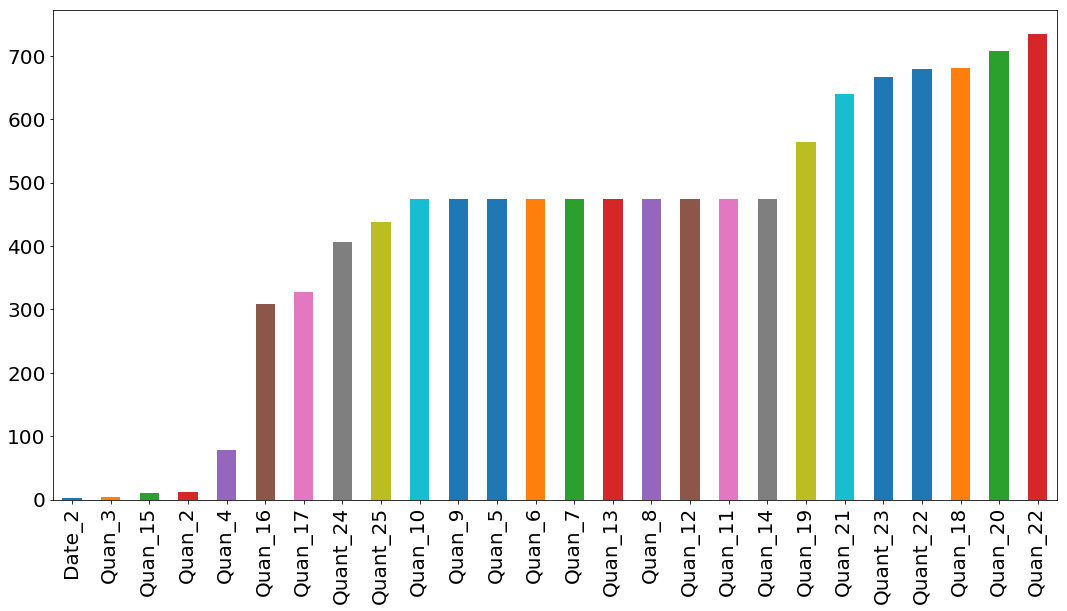

In [14]:
# check missing values
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [15]:
df_train = df_train.fillna(0)

In [21]:
# check missing values
missing = df_train.isnull().sum()
print(missing)

Outcome_M1     0
Outcome_M2     0
Outcome_M3     0
Outcome_M4     0
Outcome_M5     0
Outcome_M6     0
Outcome_M7     0
Outcome_M8     0
Outcome_M9     0
Outcome_M10    0
Outcome_M11    0
Outcome_M12    0
Cat_1          0
Date_1         0
Quan_1         0
Quan_2         0
Quan_3         0
Quan_4         0
Date_2         0
Quan_5         0
Quan_6         0
Quan_7         0
Quan_8         0
Quan_9         0
Quan_10        0
Quan_11        0
Quan_12        0
Quan_13        0
Quan_14        0
Cat_2          0
              ..
Cat_490        0
Cat_491        0
Cat_492        0
Cat_493        0
Cat_494        0
Cat_495        0
Cat_496        0
Cat_497        0
Cat_498        0
Cat_499        0
Cat_500        0
Quan_26        0
Cat_501        0
Cat_502        0
Cat_503        0
Cat_504        0
Quan_27        0
Quan_28        0
Quan_29        0
Quan_30        0
Cat_505        0
Cat_506        0
Cat_507        0
Cat_508        0
Cat_509        0
Cat_510        0
Cat_511        0
Cat_512       

In [22]:
for iter_str in range(1, 13):
    df_train = df_train.drop('', axis=1)